In [1]:
#import require python classes and packages
import pandas as pd #pandas to read and explore dataset
import numpy as np
import matplotlib.pyplot as plt #use to visualize dataset vallues
import seaborn as sns
import json
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xg 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading first dataset
dataset = pd.read_csv("Dataset/BR_youtube_trending_data.csv", low_memory=False)
dataset

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229785,28ml3N5oH8A,SÃO PAULO 1X1 FLAMENGO - CAMPEÃO DA COPA DO BR...,2023-09-24T23:57:32Z,UC0GUaQ6lVzvu0FWklbsKFhg,BAROLO VÍDEOS,17,2023-10-03T00:00:00Z,futebol|barolo|blog do barolo|barolo vídeos|sp...,332404,71021,0,5212,https://i.ytimg.com/vi/28ml3N5oH8A/default.jpg,False,False,CONTATO BAROLOcontatorbarolo@gmail.comWHATS DA...
229786,MLgUbWuH85Q,React São Paulo 1x1 Flamengo | Melhores moment...,2023-09-24T23:56:57Z,UC1gaUzbtmN3avX_JGP9Udaw,Canal Rivalidade FC,17,2023-10-03T00:00:00Z,React São Paulo 1x1 Flamengo final copa do Bra...,186457,17096,0,1051,https://i.ytimg.com/vi/MLgUbWuH85Q/default.jpg,False,False,"React do jogo São Paulo 1x1 Flamengo, acompan..."
229787,SBzodu84WAI,ESTAMOS GRÁVIDOS! 👶,2023-09-24T13:06:16Z,UCALhHwp-p5PVkMLvCkwQvEw,Yasmin Castilho,24,2023-10-03T00:00:00Z,Yasmin castilho gravidez|Descobrindo gravidez|...,658435,61387,0,1605,https://i.ytimg.com/vi/SBzodu84WAI/default.jpg,False,False,Aqui começa uma nova etapa da nossa vida! Seja...
229788,VcTv_GXPs4I,CHEGOU! iPhone 15 Pro Max já está em minhas mã...,2023-09-24T14:55:44Z,UCY5nGkuALqkKKOVhivryH3A,Gesiel Taveira,28,2023-10-03T00:00:00Z,gesiel|gesiel taveira|iphone 15|iphone 15s pro...,676781,45114,0,1599,https://i.ytimg.com/vi/VcTv_GXPs4I/default.jpg,False,False,Vim buscar o iPhone 15 Pro Max aqui nos Estado...


In [3]:
#finding and displaying count of missing or null values
dataset.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             0
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          10058
dtype: int64

In [4]:
#replacing missing values with 0 and then finding sum of missing values
dataset.fillna(0, inplace = True)
dataset.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

In [5]:
#categories of videos available on youtube
id_category_dict = {}
with open('Dataset/BR_category_id.json', 'r') as f:
    content = json.load(f)
    for item in content['items']:
        id_category_dict[item['id']] = item['snippet']['title']
id_category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

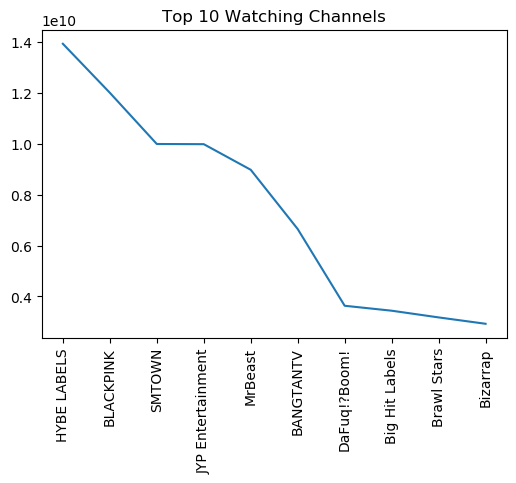

,channelTitle,view_count
0,HYBE LABELS,13920265921
1,BLACKPINK,11997700529
2,SMTOWN,9986119287
3,JYP Entertainment,9979155197
4,MrBeast,8973814571
5,BANGTANTV,6647549565
6,DaFuq!?Boom!,3635993278
7,Big Hit Labels,3442041400
8,Brawl Stars,3178678781
9,Bizarrap,2928851196


In [6]:
#top watching channels
views = dataset.groupby('channelTitle')['view_count'].sum().sort_values(ascending=False).nlargest(10).reset_index()
plt.figure(figsize=(6,4))
plt.plot(views['channelTitle'], views['view_count'])
plt.title("Top 10 Watching Channels")
plt.xticks(rotation=90)
plt.show()
views

,Category,Count
0,Entertainment,56152
1,Music,51269
2,Gaming,33439
3,Sports,33228
4,People & Blogs,28920
5,Comedy,9486
6,News & Politics,3603
7,Science & Technology,2974
8,Education,2792
9,Film & Animation,2582


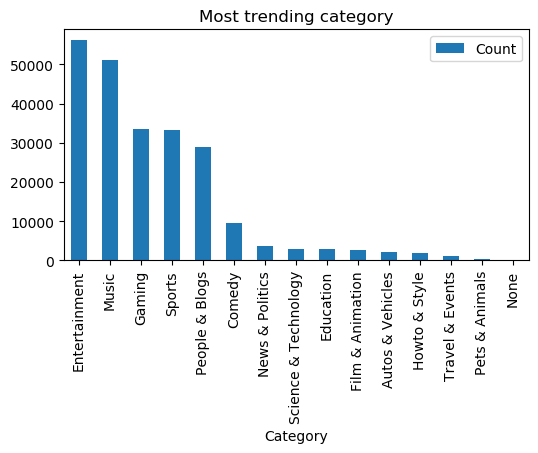

In [7]:
#plotting number of videos uploaded in different categories
data = dataset.categoryId.value_counts().reset_index()
data['index'] = data['index'].astype(str)
data = data.values
for i in range(len(data)):
    data[i,0] = id_category_dict.get(data[i,0])
data = pd.DataFrame(data, columns=['Category', 'Count'])    
data.plot(kind='bar', x="Category", y="Count", title='Most trending category', figsize=(6,3))
data

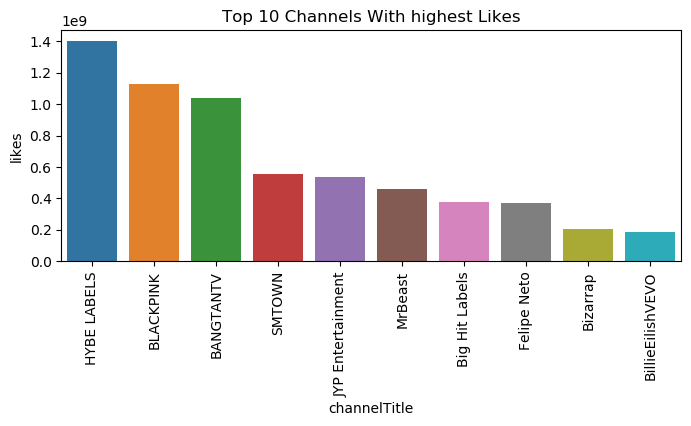

In [8]:
#channels with top likes
data = dataset.groupby(['channelTitle'])['likes'].sum().sort_values(ascending=False).nlargest(10).reset_index()
plt.figure(figsize=(8,3))
sns.barplot(x='channelTitle',y='likes', data=data)
plt.title('Top 10 Channels With highest Likes')
plt.xticks(rotation=90)
plt.show()

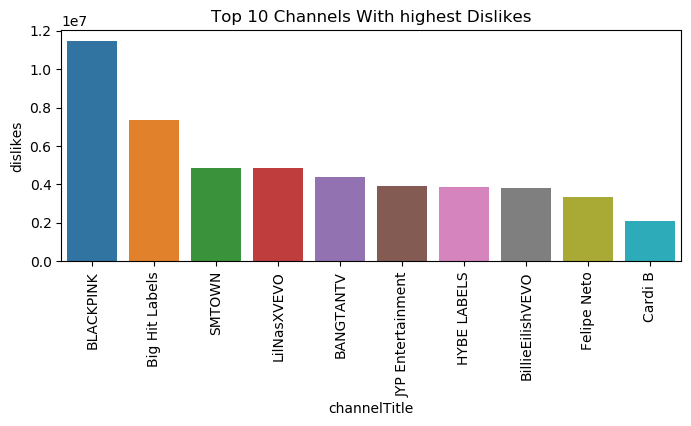

In [9]:
#channels with top dislikes
data = dataset.groupby(['channelTitle'])['dislikes'].sum().sort_values(ascending=False).nlargest(10).reset_index()
plt.figure(figsize=(8,3))
sns.barplot(x='channelTitle',y='dislikes', data=data)
plt.title('Top 10 Channels With highest Dislikes')
plt.xticks(rotation=90)
plt.show()

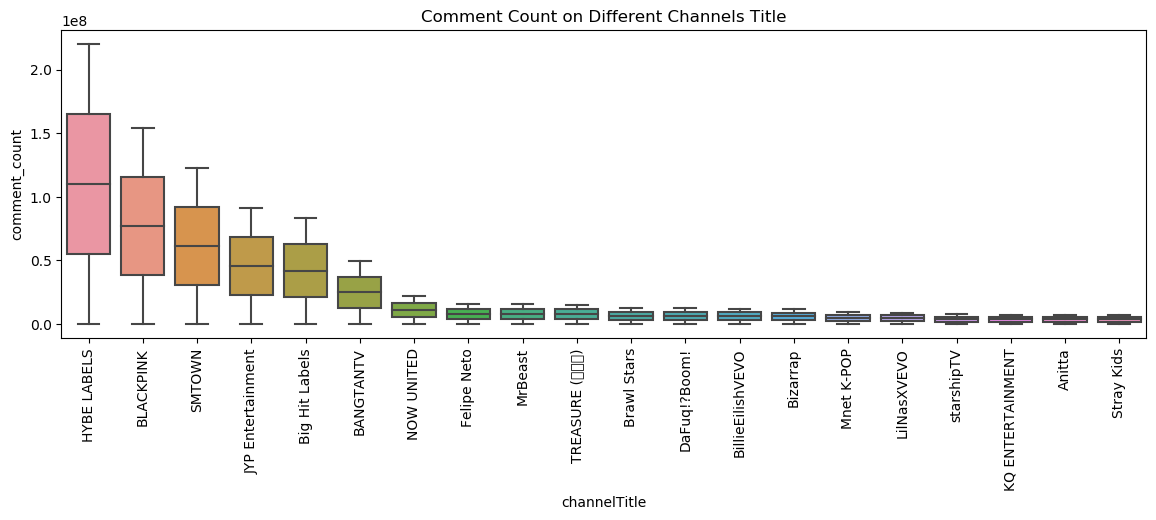

In [10]:
#channels which recive highest comments
data = dataset.groupby(['channelTitle'])['comment_count'].sum().sort_values(ascending=False).nlargest(20).reset_index()
temp = data.values
val = []
for i in range(len(temp)):
    val.append([temp[i,0], 0])
    val.append([temp[i,0], temp[i,1]])
data = pd.DataFrame(val, columns=['channelTitle', 'comment_count'])    
fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(data=data, x="channelTitle", y="comment_count")
plt.xticks(rotation=90)
plt.title("Comment Count on Different Channels Title")
plt.show()


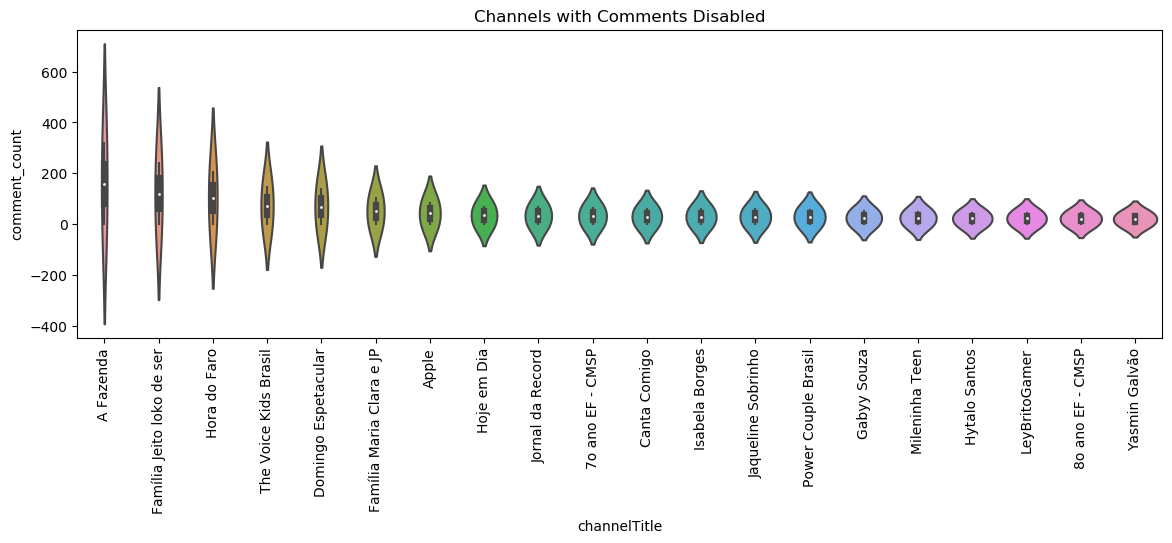

In [11]:
#channels with disables comments
data = dataset.groupby(['channelTitle'])['comments_disabled'].sum().sort_values(ascending=False).nlargest(20).reset_index()
temp = data.values
val = []
for i in range(len(temp)):
    val.append([temp[i,0], 0])
    val.append([temp[i,0], temp[i,1]])
data = pd.DataFrame(val, columns=['channelTitle', 'comment_count'])    
fig, ax = plt.subplots(figsize=(14, 4))
sns.violinplot(data=data, x="channelTitle", y="comment_count")
plt.xticks(rotation=90)
plt.title("Channels with Comments Disabled")
plt.show()

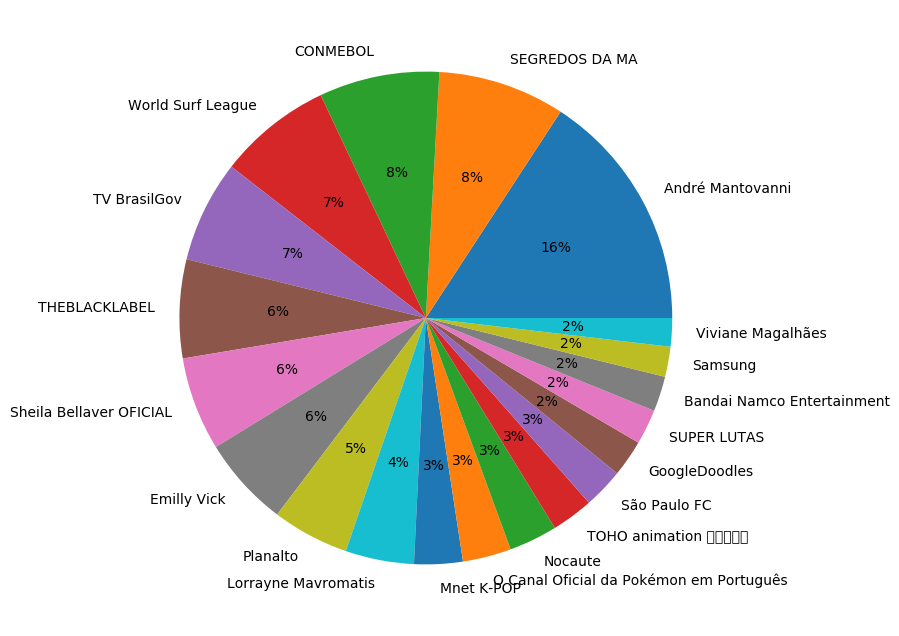

In [12]:
#channels with highets number of disables ratings
data = dataset.groupby(['channelTitle'])['ratings_disabled'].sum().sort_values(ascending=False).nlargest(20).reset_index()
plt.figure(figsize=(8,8))
plt.pie(data['ratings_disabled'], labels=data['channelTitle'], autopct='%.0f%%') 
plt.show() 

In [13]:
#taking comment count as Y target variable
Y = dataset['comment_count'].ravel()
Y = Y.reshape(-1, 1)
dataset.drop(['comment_count'], axis = 1,inplace=True)
label_encoder = []
cols = []
columns = dataset.columns
types = dataset.dtypes.values
#looping all columns and then converting all non-numeric values to numeric values uisng label encoder class
for i in range(len(types)):
    name = types[i]
    if name == 'object' or name=='bool': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric
        label_encoder.append(le)
        cols.append(columns[i])
dataset.fillna(0, inplace = True)
print("Dataset After Cleaning & Processing")
dataset

Dataset After Cleaning & Processing


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,thumbnail_link,comments_disabled,ratings_disabled,description
0,30421,17184,186,1454,3837,22,0,20164,263835,85095,487,30428,0,0,23455
1,25785,15549,169,3140,2321,10,0,5165,6000070,714310,15176,25792,0,0,12556
2,2189,23453,122,4257,292,22,0,7231,2296748,39761,5484,2189,1,0,23634
3,23889,8089,167,595,2735,20,0,8060,300510,46222,242,23896,0,0,27538
4,28116,11454,179,1270,4662,23,0,9054,327235,22059,3972,28123,0,0,8108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229785,1622,29107,33794,109,343,17,1127,15222,332404,71021,0,1622,0,0,5496
229786,12551,27119,33793,235,780,17,1127,7908,186457,17096,0,12556,0,0,22594
229787,15647,10699,33770,935,5116,24,1127,9823,658435,61387,0,15652,0,0,3586
229788,17494,5620,33772,2867,1963,28,1127,15488,676781,45114,0,17499,0,0,27336


In [14]:
#normalizing training features and labels
X = dataset.values
scaler = MinMaxScaler(feature_range = (0, 1))
scaler1 = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)#normalize train features
Y = scaler1.fit_transform(Y)#normalize train features
print("Normalized Features")
print(X)

Normalized Features
[[0.87810299 0.48744788 0.00546834 ... 0.         0.         0.73836807]
 [0.74428472 0.44106885 0.00496854 ... 0.         0.         0.39526538]
 [0.06318554 0.66527671 0.00358676 ... 1.         0.         0.74400302]
 ...
 [0.45165108 0.3034919  0.99282648 ... 0.         0.         0.11288799]
 [0.50496478 0.15941906 0.99288528 ... 0.         0.         0.86054272]
 [0.85111419 0.82744731 0.99347328 ... 0.         0.         0.82836996]]


In [15]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 229790
Total features found in dataset= 15
80% dataset for training : 183832
20% dataset for testing  : 45958


In [16]:
#define global variables to calculate and MSE and R2 score
mse = []
r2scores = []

In [17]:
#function to calculate accuracy and prediction sales graph
def calculateMetrics(algorithm, predict, test_labels):
    mse_value = mean_squared_error(test_labels, predict)
    score = metrics.r2_score(np.asarray(test_labels), np.asarray(predict))
    print(algorithm+" MSE : "+str(mse_value))
    print(algorithm+" R2Score : "+str(score))
    
    predict = predict.reshape(-1, 1)
    predict = scaler1.inverse_transform(predict)
    test_label = scaler1.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()    
    
    mse.append(mse_value)
    r2scores.append(score)
    predict = predict[0:200]
    test_label = test_label[0:200]
    print()
    for i in range(0, 20):
        print("True Comment Count : "+str(test_label[i])+" Predicted Comment Count : "+str(predict[i]))
    plt.figure(figsize=(5,3))
    plt.plot(test_label, color = 'red', label = 'True Comment Count')
    plt.plot(predict, color = 'green', label = 'Predicted Comment Count')
    plt.title(algorithm+' Test & Predicted Comment Count Graph')
    plt.xlabel('Test Data')
    plt.ylabel('Predicted Commnet Counts')
    plt.legend()
    plt.show()

Linear Regression MSE : 5.3238094008080326e-05
Linear Regression R2Score : 0.5647136638602033

True Comment Count : 256.0 Predicted Comment Count : -6490.269496615088
True Comment Count : 6400.0 Predicted Comment Count : -501.49630328134555
True Comment Count : 19712.0 Predicted Comment Count : 24485.99463118878
True Comment Count : 2573.0 Predicted Comment Count : -2419.568677456966
True Comment Count : 874.0 Predicted Comment Count : -8208.795127629795
True Comment Count : 42278.0 Predicted Comment Count : 87182.39749883309
True Comment Count : 1411.0 Predicted Comment Count : -1129.4812159599746
True Comment Count : 45481.0 Predicted Comment Count : 127562.32618994376
True Comment Count : 419.99999999999994 Predicted Comment Count : -9109.01249508106
True Comment Count : 1167.0 Predicted Comment Count : -10216.894094424832
True Comment Count : 22047.0 Predicted Comment Count : 56132.464590003794
True Comment Count : 3333.0000000000005 Predicted Comment Count : 13490.516493369843
Tru

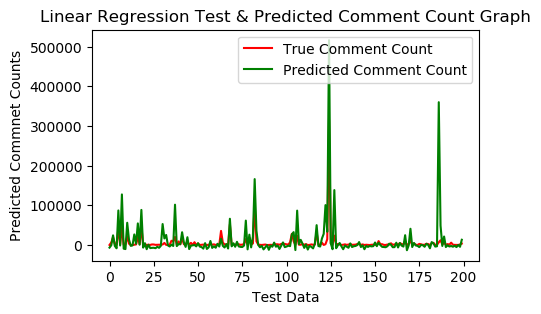

In [18]:
#train linear regression on 80% train data and then performing prediction on 20% test data
#algorithm performance will be evaluated in terms of MSE and R2Score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) #train model
predict = lr_model.predict(X_test)#perform prediction on test data
#calculate algorithm performance using MSE & R2score
calculateMetrics("Linear Regression", predict, y_test)

Decision Tree MSE : 4.675767155900413e-06
Decision Tree R2Score : 0.9617699019497997

True Comment Count : 256.0 Predicted Comment Count : 262.0
True Comment Count : 6400.0 Predicted Comment Count : 6420.0
True Comment Count : 19712.0 Predicted Comment Count : 21370.0
True Comment Count : 2573.0 Predicted Comment Count : 2570.0
True Comment Count : 874.0 Predicted Comment Count : 857.0
True Comment Count : 42278.0 Predicted Comment Count : 42300.0
True Comment Count : 1411.0 Predicted Comment Count : 1443.0
True Comment Count : 45481.0 Predicted Comment Count : 44983.0
True Comment Count : 419.99999999999994 Predicted Comment Count : 416.0
True Comment Count : 1167.0 Predicted Comment Count : 1390.0
True Comment Count : 22047.0 Predicted Comment Count : 21720.0
True Comment Count : 3333.0000000000005 Predicted Comment Count : 3355.0000000000005
True Comment Count : 235.0 Predicted Comment Count : 205.0
True Comment Count : 0.0 Predicted Comment Count : 0.0
True Comment Count : 817.0 Pr

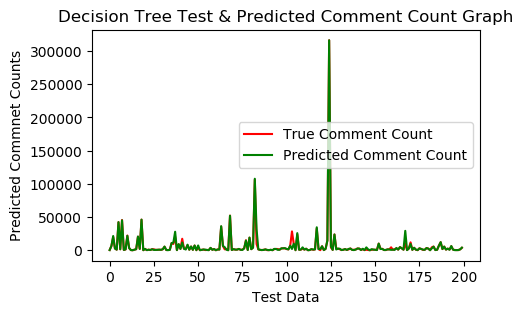

In [19]:
#train DecisionTreeRegressor on 80% train data and then performing prediction on 20% test data
#algorithm performance will be evaluated in terms of MSE and R2Score
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train) #train model
predict = dt_model.predict(X_test)#perform prediction on test data
#calculate algorithm performance using MSE & R2score
calculateMetrics("Decision Tree", predict, y_test)

XGBoost MSE : 1.9301589313877115e-06
XGBoost R2Score : 0.9842185971330276

True Comment Count : 256.0 Predicted Comment Count : 246.14001
True Comment Count : 6400.0 Predicted Comment Count : 5737.3706
True Comment Count : 19712.0 Predicted Comment Count : 14059.218
True Comment Count : 2573.0 Predicted Comment Count : 1921.8563
True Comment Count : 874.0 Predicted Comment Count : 1251.6139
True Comment Count : 42278.0 Predicted Comment Count : 26646.137
True Comment Count : 1411.0 Predicted Comment Count : 2127.634
True Comment Count : 45481.0 Predicted Comment Count : 38460.656
True Comment Count : 419.99999999999994 Predicted Comment Count : 492.5967
True Comment Count : 1167.0 Predicted Comment Count : 700.4945
True Comment Count : 22047.0 Predicted Comment Count : 17173.693
True Comment Count : 3333.0000000000005 Predicted Comment Count : 4747.8154
True Comment Count : 235.0 Predicted Comment Count : 530.96155
True Comment Count : 0.0 Predicted Comment Count : 1115.5109
True Comme

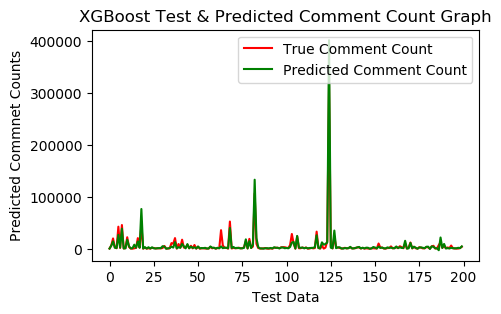

In [20]:
#train XGBoost on 80% train data and then performing prediction on 20% test data
#algorithm performance will be evaluated in terms of MSE and R2Score
xg_model = xg.XGBRegressor()
xg_model.fit(X_train, y_train) #train model
predict = xg_model.predict(X_test)#perform prediction on test data
#calculate algorithm performance using MSE & R2score
calculateMetrics("XGBoost", predict, y_test)

In [21]:
#showing all algorithms MSE and R2Score in tabular format
columns = ["Algorithm Name", "MSE", "R2Score"]
values = []
algorithm_names = ["Linear Regression", "Decision Tree", "XGBoost"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i], mse[i], r2scores[i]])
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,MSE,R2Score
0,Linear Regression,0.000053,0.564714
1,Decision Tree,0.000005,0.961770
2,XGBoost,0.000002,0.984219


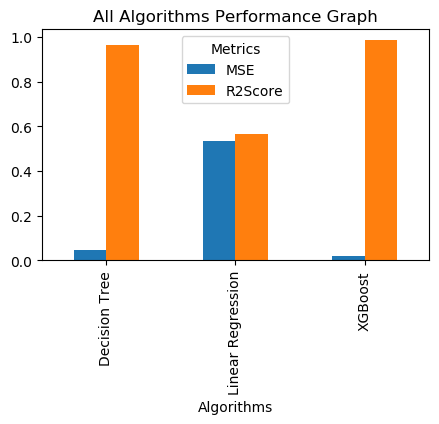

In [22]:
#comparison graph between all algorithms using MSE and R2Score
df = pd.DataFrame([
                    ['Linear Regression','MSE',mse[0]*10000],['Linear Regression','R2Score',r2scores[0]],
                    ['Decision Tree','MSE',mse[1]*10000],['Decision Tree','R2Score',r2scores[1]],
                    ['XGBoost','MSE',mse[2]*10000],['XGBoost','R2Score',r2scores[2]],
                  ],columns=['Algorithms','Metrics','Value'])
df.pivot_table(index="Algorithms", columns="Metrics", values="Value").plot(kind='bar', figsize=(5,3))
plt.title("All Algorithms Performance Graph")
plt.show()